# Siamese dataset

In [1]:
import pandas as pd
import seaborn as sns

In [36]:
df = pd.read_csv('../data/dataset_training/patch_level1.csv')
# df = pd.read_csv('../data/dataset_validation/patch_level1.csv')

print(df.shape)
df.head(1)

(60374, 13)


,wsi,msi,wsi_id,dataset,patch,level,x,y,size,tumor_ratio,blank_ratio,file,mega_patch_size
0,training_data_01,1,1,train,training_data_01_l1_48128_76800,1,48128,76800,256,0.997803,0.035156,PAIP2020/training/patch_level1_256_macenko/tra...,2


In [37]:
%%time

MIN_MM = 0.5
MAX_MM = 10

near_nums = []
far_nums = []
near_patches = []
far_patches = []

for wsi in df['wsi'].unique():
#     print(wsi)
    
    df1 = df[df['wsi'] == wsi]
    
    for idx, row in df1.iterrows():
        dist = ((df1['x'] - row['x']) ** 2 + (df1['y'] - row['y']) ** 2) ** 0.5
        near_df = df1[(dist < 4096 * MIN_MM) & (dist > 0)]
        far_df = df1[(dist > 4096 * MAX_MM)]
        
        
        if near_df.shape[0] == 0:
            near_patch = ''
        else:
            near_patch = ','.join(near_df['file'].tolist())
        
        if far_df.shape[0] == 0:
            far_patch = ''
        elif far_df.shape[0] <= 8:
            far_patch = ','.join(far_df['file'].tolist())
        else:
            far_patch = ','.join(far_df['file'].sample(8).tolist())
        
#         if near_df.shape[0] == 0:
#             near_patch = ''
#         else:
#             near_patch = near_df['file'].tolist()[0]
        
#         if far_df.shape[0] == 0:
#             far_patch = ''
#         else:
#             far_patch = far_df['file'].tolist()[0]
        
        
        near_nums.append(near_df.shape[0])
        far_nums.append(far_df.shape[0])
        near_patches.append(near_patch)
        far_patches.append(far_patch)

df['near_nums'] = near_nums
df['far_nums'] = far_nums
df['near_patches'] = near_patches
df['far_patches'] = far_patches

print(df.shape)
df.head(1)

(60374, 17)
Wall time: 2min 26s


,wsi,msi,wsi_id,dataset,patch,level,x,y,size,tumor_ratio,blank_ratio,file,mega_patch_size,near_nums,far_nums,near_patches,far_patches
0,training_data_01,1,1,train,training_data_01_l1_48128_76800,1,48128,76800,256,0.997803,0.035156,PAIP2020/training/patch_level1_256_macenko/tra...,2,4,1252,PAIP2020/training/patch_level1_256_macenko/tra...,PAIP2020/training/patch_level1_256_macenko/tra...


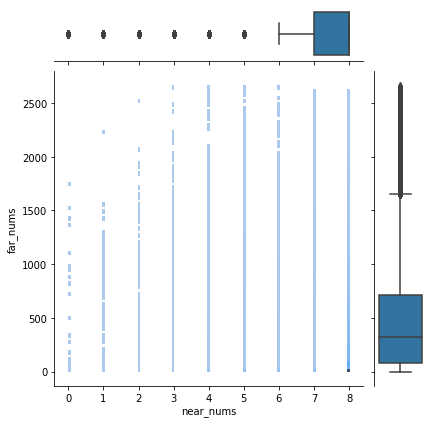

In [38]:
t = df.copy()

g = sns.JointGrid(data=t, x="near_nums", y="far_nums")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

In [39]:
t = df.copy()

t['valid'] = (t['near_nums'] >= 1) & (t['far_nums'] >= 1)
print(t['valid'].sum())
counter = t.groupby(['wsi', 'msi'])['valid'].sum().sort_values()
counter = counter.reset_index()

counter

53329


,wsi,msi,valid
0,training_data_45,0,0.0
1,training_data_21,0,0.0
2,training_data_38,0,0.0
3,training_data_04,0,2.0
4,training_data_28,0,37.0
5,training_data_43,0,66.0
6,training_data_03,0,115.0
7,training_data_39,0,190.0
8,training_data_40,0,220.0
9,training_data_09,0,371.0


# Save

In [40]:
discard = counter.loc[counter['valid'] < 100, 'wsi'].tolist()

df2 = df[(df['far_nums'] >= 1) & (df['near_nums'] >= 1) & (~ df['wsi'].isin(discard))]

print(df2.shape)
print(discard)

df2.to_csv('../data/dataset_training/siamese_patch_level1.csv', index=False)

(53224, 17)
['training_data_45', 'training_data_21', 'training_data_38', 'training_data_04', 'training_data_28', 'training_data_43']
